# Project - Flight_Booking

## Problem Statement
The objective is to analyze the flight booking dataset obtained from a platform which is used to book flight tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers. Apply EDA, statistical methods and Machine learning algorithms in order to get meaningful information from it. 

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression, LogisticRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

### Loading the data

In [2]:
df = pd.read_csv("Flight_Booking.csv")
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


### Checking for null values

In [3]:
df.isna().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

### Deleting unnecessary columns

In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


### Checking all info about data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [7]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


---
## Data Visualization

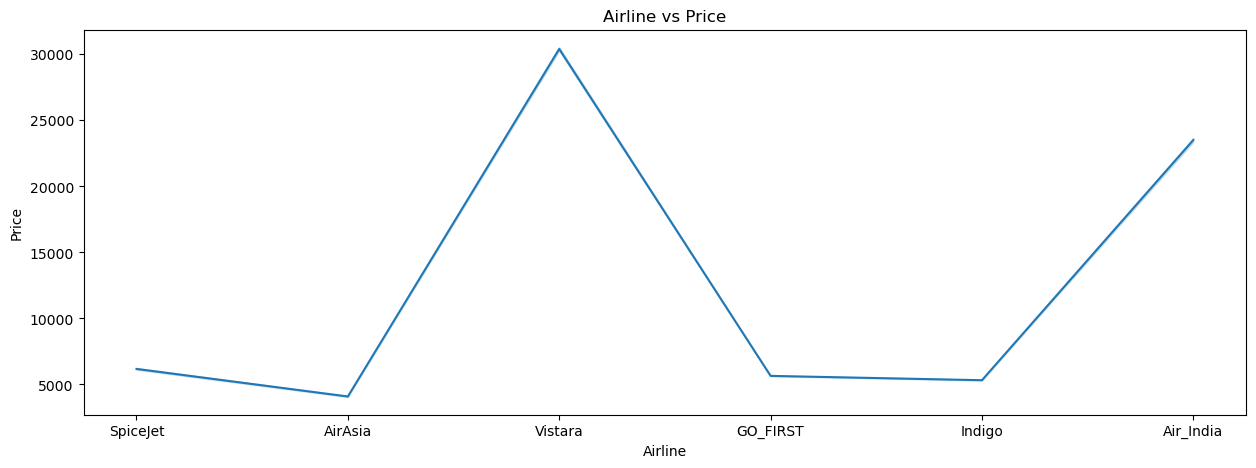

In [8]:
plt.figure(figsize=(15,5))
x = df['airline']
y = df['price']
sns.lineplot(data=df, x=x, y=y)
plt.title('Airline vs Price')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.show()

`Observation: Vistara and Air India flights costs significantly more than others`

In [ ]:
plt.figure(figsize=(15,5))
x = df['days_left']
y = df['price']
sns.lineplot(data=df, x=x, y=y, color='blue')
plt.title('Days left for Departure vs Price')
plt.xlabel('Days left for Departure')
plt.ylabel('Price')
plt.show()

`Observation: The price of the ticket decreases as the days left for departure increases`

In [ ]:
x = df['airline']
y = df['price']
sns.barplot(data=df, x=x, y=y)
plt.title('Airline vs Price')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.show()

In [ ]:
x = df['class']
y = df['price']
sns.barplot(data=df, x=x, y=y, hue='airline')
plt.title('Airline vs Price')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.show()

`Observation: The price increase in Vistara and Air India is only due to them providing business class.`

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(20,6))
x = df['days_left']
y = df['price']
sns.lineplot(data=df, x=x, y=y, hue='source_city', ax=ax[0])
sns.lineplot(data=df, x=x, y=y, hue='destination_city', ax=ax[1])
plt.show()

In [ ]:
plt.figure(figsize=(15,23))

plt.subplot(4,2,1)
sns.countplot(x=df['airline'], data=df)
plt.title('Frequency of Airline')

plt.subplot(4,2,2)
sns.countplot(x=df['class'], data=df)
plt.title('Frequency of Class')

plt.subplot(4,2,3)
sns.countplot(x=df['source_city'], data=df)
plt.title('Frequency of Source City')

plt.subplot(4,2,4)
sns.countplot(x=df['destination_city'], data=df)
plt.title('Frequency of Destination City')


plt.subplot(4,2,5)
sns.countplot(x=df['arrival_time'], data=df)
plt.title('Frequency of Arrival Time')

plt.subplot(4,2,6)
sns.countplot(x=df['departure_time'], data=df)
plt.title('Frequency of Departure Time')

plt.subplot(4,2,7)
sns.countplot(x=df['stops'], data=df)
plt.title('Frequency of Stops')


plt.show()

---
## Label Encoding

In [ ]:
df.info()

In [207]:
le = LabelEncoder()

In [208]:
for i in df.columns:
    if df[i].dtype=='object':
        df[i] = le.fit_transform(df[i])

In [209]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,5,1477,1,4,0,2,3,0,10.08,49,69265
300149,5,1481,1,0,0,5,3,0,10.42,49,77105
300150,5,1486,1,1,0,5,3,0,13.83,49,79099
300151,5,1483,1,1,0,2,3,0,10.00,49,81585


## Feature Selection

In [210]:
df.corr()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
airline,1.000000,0.637918,-0.028350,0.056885,-0.029838,0.037714,-0.030172,-0.178862,-0.001651,-0.010678,0.243358
flight,0.637918,1.000000,-0.009443,0.071564,-0.118833,0.067175,-0.036248,-0.259531,0.205502,-0.000443,0.305872
source_city,-0.028350,-0.009443,1.000000,-0.004688,0.001819,0.044153,-0.222935,0.000075,0.008619,-0.003568,0.004594
departure_time,0.056885,0.071564,-0.004688,1.000000,-0.008518,-0.046282,-0.001761,-0.053340,0.084348,-0.001597,0.058319
stops,-0.029838,-0.118833,0.001819,-0.008518,1.000000,0.010515,-0.012846,0.100262,-0.473860,-0.007047,-0.202620
arrival_time,0.037714,0.067175,0.044153,-0.046282,0.010515,1.000000,-0.037431,-0.027647,0.008679,-0.004191,0.042043
destination_city,-0.030172,-0.036248,-0.222935,-0.001761,-0.012846,-0.037431,1.000000,0.001603,0.001736,-0.005323,0.004795
class,-0.178862,-0.259531,0.000075,-0.053340,0.100262,-0.027647,0.001603,1.000000,-0.138710,0.013039,-0.937860
duration,-0.001651,0.205502,0.008619,0.084348,-0.473860,0.008679,0.001736,-0.138710,1.000000,-0.039157,0.204222
days_left,-0.010678,-0.000443,-0.003568,-0.001597,-0.007047,-0.004191,-0.005323,0.013039,-0.039157,1.000000,-0.091949


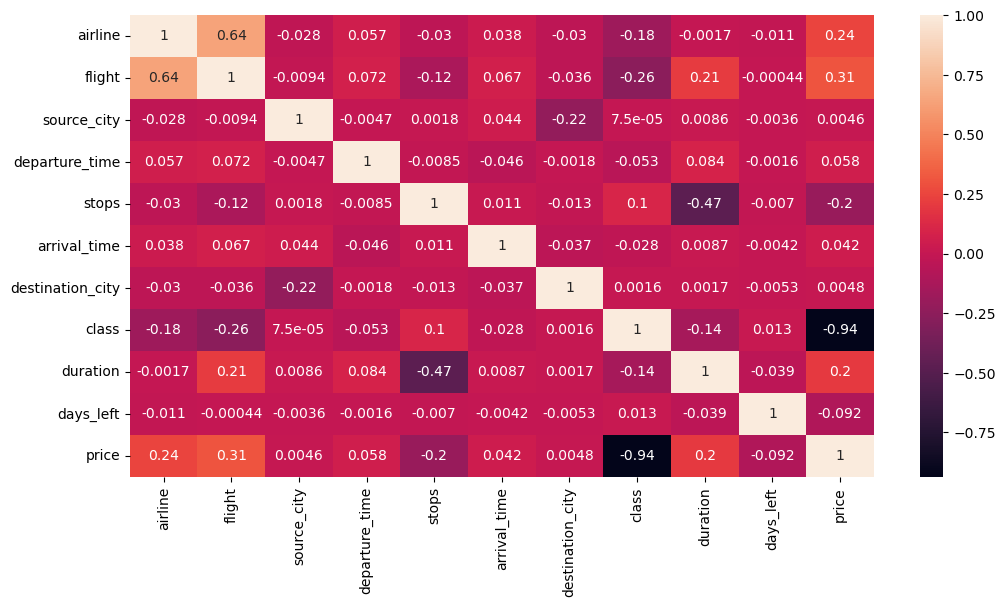

In [211]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

### VIF

In [212]:
col_list = []
for col in df.columns:
    if((df[col].dtype!='object') & (col!='price')):
        col_list.append(col)

In [213]:
col_list

['airline',
 'flight',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class',
 'duration',
 'days_left']

In [214]:
X = df[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

            feature        VIF
0           airline   6.701818
1            flight  12.675046
2       source_city   2.969540
3    departure_time   2.806009
4             stops   1.437326
5      arrival_time   3.784873
6  destination_city   2.918792
7             class   2.852072
8          duration   4.754588
9         days_left   4.071591


In [215]:
df.drop(columns=['flight'], inplace=True)

In [216]:
col_list = []
for col in df.columns:
    if((df[col].dtype!='object') & (col!='price')):
        col_list.append(col)
        
X = df[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

            feature       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


---

In [217]:
model_score = pd.DataFrame(index=["RMSE", "R2 Score"])

## Linear Regression

In [218]:
X = df.drop(columns=['price'])
y = df['price']

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

In [220]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [221]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [222]:
y_pred = lr.predict(X_test)

In [223]:
difference = pd.DataFrame(np.c_[y_test, y_pred], columns=['Actual Value', 'Predicted value'])
difference

,Actual Value,Predicted value
0,7366.0,4585.880510
1,64831.0,52842.077073
2,6195.0,7877.980184
3,60160.0,56120.138579
4,6578.0,6663.204177
...,...,...
60026,5026.0,5829.230618
60027,3001.0,539.222230
60028,6734.0,5848.965500
60029,5082.0,-1498.061918


In [224]:
print('Mean Absolute Error:',mean_absolute_error(y_test, y_pred))
print('Mean Absolute Percentage Error:',mean_absolute_percentage_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:',mse)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:',rmse)
print('R2 Score:',r2_score(y_test, y_pred))

Mean Absolute Error: 4624.994868016906
Mean Absolute Percentage Error: 0.4353581089683334
Mean Squared Error: 49200540.293722
Root Mean Squared Error: 7014.309680483319
R2 Score: 0.904554350718816


In [225]:
model_score['Linear Regressor'] = [rmse, r2_score(y_test, y_pred)]

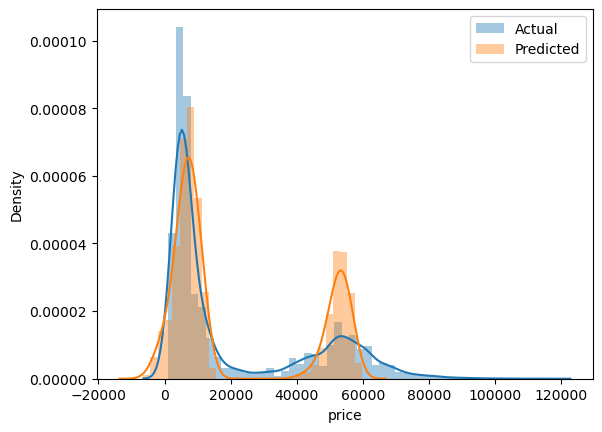

In [226]:
sns.distplot(y_test, label='Actual')
sns.distplot(y_pred, label='Predicted')
plt.legend()
plt.show()

---
## Decision Tree Regressor

In [227]:
dec_tree = DecisionTreeRegressor()
dec_tree.fit(X_train,y_train)

DecisionTreeRegressor()

In [228]:
y_pred = dec_tree.predict(X_test)

In [229]:
difference = pd.DataFrame(np.c_[y_test, y_pred], columns=['Actual Value', 'Predicted value'])
difference

,Actual Value,Predicted value
0,7366.0,7366.0
1,64831.0,72783.0
2,6195.0,6195.0
3,60160.0,60160.0
4,6578.0,6578.0
...,...,...
60026,5026.0,5301.0
60027,3001.0,3001.0
60028,6734.0,6314.0
60029,5082.0,5082.0


In [230]:
print('Mean Absolute Error:',mean_absolute_error(y_test, y_pred))
print('Mean Absolute Percentage Error:',mean_absolute_percentage_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:',mse)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:',rmse)
print('R2 Score:',r2_score(y_test, y_pred))

Mean Absolute Error: 1180.8148317813575
Mean Absolute Percentage Error: 0.07409950366975249
Mean Squared Error: 12727810.077601109
Root Mean Squared Error: 3567.6056505170395
R2 Score: 0.9753089277164046


In [231]:
model_score['Decision Tree Regressor'] = [rmse, r2_score(y_test, y_pred)]

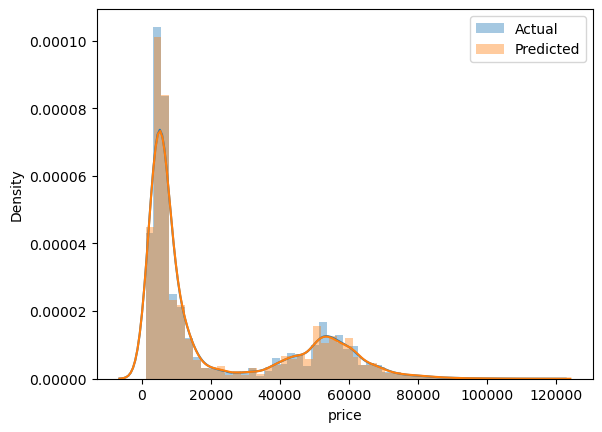

In [232]:
sns.distplot(y_test, label='Actual')
sns.distplot(y_pred, label='Predicted')
plt.legend()
plt.show()

---
## Random Forest Regressor

In [233]:
rand_forest = RandomForestRegressor()
rand_forest.fit(X_train,y_train)

RandomForestRegressor()

In [234]:
y_pred = rand_forest.predict(X_test)

In [235]:
difference = pd.DataFrame(np.c_[y_test, y_pred], columns=['Actual Value', 'Predicted value'])
difference

,Actual Value,Predicted value
0,7366.0,6538.95
1,64831.0,70074.84
2,6195.0,6195.00
3,60160.0,60160.19
4,6578.0,6567.50
...,...,...
60026,5026.0,5157.69
60027,3001.0,2997.36
60028,6734.0,6475.61
60029,5082.0,4443.47


In [236]:
print('Mean Absolute Error:',mean_absolute_error(y_test, y_pred))
print('Mean Absolute Percentage Error:',mean_absolute_percentage_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:',mse)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:',rmse)
print('R2 Score:',r2_score(y_test, y_pred))

Mean Absolute Error: 1088.2581492673232
Mean Absolute Percentage Error: 0.07025534631070075
Mean Squared Error: 7720805.35135172
Root Mean Squared Error: 2778.633720257443
R2 Score: 0.9850221709897069


In [237]:
model_score['Random Forest Regressor'] = [rmse, r2_score(y_test, y_pred)]

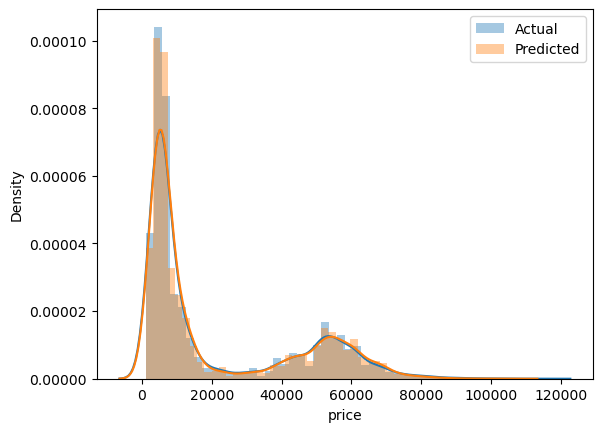

In [238]:
sns.distplot(y_test, label='Actual')
sns.distplot(y_pred, label='Predicted')
plt.legend()
plt.show()

---

In [239]:
model_score

,Linear Regressor,Decision Tree Regressor,Random Forest Regressor
RMSE,7014.309680,3567.605651,2778.633720
R2 Score,0.904554,0.975309,0.985022


`Observation: Random Forest model is the best of all 3`